<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/PHONEPEAPP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#pip install google-play-scraper

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 Phone pe (com.phonepe.app)

2 Google pay (com.google.android.apps.nbu.paisa.user)

3 PayTM (net.one97.paytm)

4 Mobikwik (com.mobikwik_new)

5 PhonPe business(com.phonepe.app.business)

6 BharatPe (com.bharatpe.app)
 

In [32]:
# # Define and configure Google Play Scraper library
# phonepe_users_reviews = reviews_all(
#     'com.phonepe.app',
#     sleep_milliseconds=0,
#     #lang='chi', # Default language is 'en', set language to Chinese.
#     #country='hk', # Default country is 'us', set country to Hong Kong.
#     count=200000, # defaults to 100
#     sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
# )

In [33]:
# #Convert collected reviews data into dataframe
# df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
# df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# # Display dataframe header
# df_reviews.head()

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df_reviews= pd.read_csv('/content/drive/MyDrive/ACESS DATA/APP REVIEWS/phonepe_review.csv')

In [36]:
# Display dataframe header
df_reviews.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,63cf0ace-8b48-4e96-8ef9-ecc4f3a5d6dd,Sagar S,https://play-lh.googleusercontent.com/a-/ACB-R...,One of the best payment apps in India! The UI ...,4,7201,4.1.47,2023-03-09 20:53:42,"We are sorry to hear this, Sagar. Could you pl...",2023-02-27 07:03:15
1,1,37c4b178-27b4-44a4-bcfe-9a55f2c1609b,SUJIT BAGDI,https://play-lh.googleusercontent.com/a-/ACB-R...,I love this app but since I bought my new phon...,3,718,4.1.48,2023-04-01 06:43:49,"Hi, Sujit. Our team would like to take a close...",2023-04-01 07:53:58
2,2,94937a72-a557-4096-a0e1-dc46c32f903e,Sanjeev Jikamade,https://play-lh.googleusercontent.com/a-/ACB-R...,Annoying recharge popup which requires 2 taps ...,2,5562,4.1.46,2023-03-01 07:47:58,Hello Sanjeev! We understand your concern. You...,2023-03-01 07:56:15
3,3,dfaea4ab-b551-4e24-ba2f-c638097d1a60,Vaibhav Bhagat,https://play-lh.googleusercontent.com/a-/ACB-R...,I'm a visually impaired user who uses PhonePe ...,3,7199,4.1.46,2023-02-16 16:11:05,Thank you for reaching out to us with your val...,2023-02-16 16:50:13
4,4,31253b15-2145-4e3d-98c8-8f23edba2d97,Rashmi Mittal,https://play-lh.googleusercontent.com/a-/ACB-R...,"Hello, I have been using this app since 2 year...",3,11,4.1.49,2023-04-14 11:41:02,"Hi, Rashmi. We understand your requirement and...",2023-04-14 12:02:41


In [37]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237407 entries, 0 to 237406
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            237407 non-null  int64 
 1   reviewId              237407 non-null  object
 2   userName              237407 non-null  object
 3   userImage             237407 non-null  object
 4   content               237407 non-null  object
 5   score                 237407 non-null  int64 
 6   thumbsUpCount         237407 non-null  int64 
 7   reviewCreatedVersion  205395 non-null  object
 8   at                    237407 non-null  object
 9   replyContent          110726 non-null  object
 10  repliedAt             110726 non-null  object
dtypes: int64(3), object(8)
memory usage: 19.9+ MB


In [38]:
df_reviews = df_reviews.sample(frac=0.03)

In [39]:
df_reviews.shape

(7122, 11)

In [40]:
#df_reviews.to_csv('bharatpe_review.csv')

In [41]:
# Count number of review scores
df_reviews['score'].value_counts()

5    3408
1    2009
4     970
3     429
2     306
Name: score, dtype: int64

<Axes: ylabel='score'>

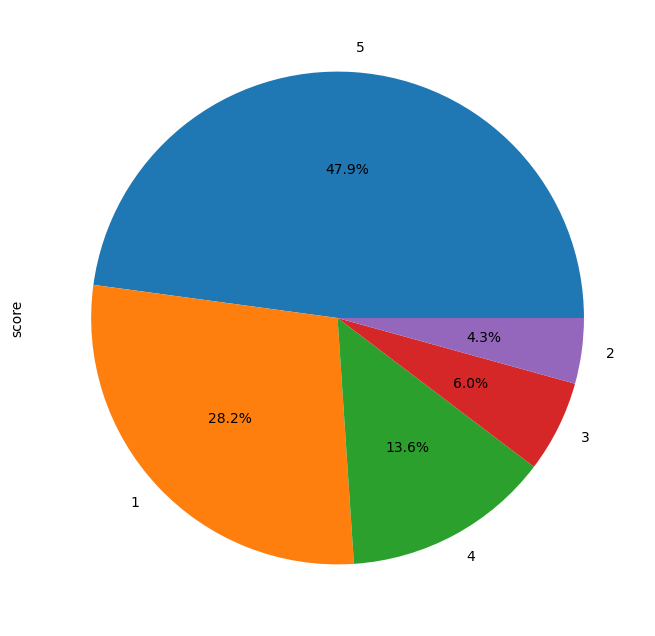

In [42]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [43]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [44]:
# Display new dataframe header
df_reviews_content.head()

,content,score
86891,"nice app ,easy to transfer money, recharge mob...",5
208961,Stop giving unnecessary chasback offers.,1
116175,Upi transaction very good but wallet facilitie...,4
225610,Actually my Hindustan bank is not in this app ...,3
182183,Good very well,5


Install azure text analytics API

In [45]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [47]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [48]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Streaming output truncated to the last 5000 lines.
Review Content Sentiment: positive
Review Content Score: 5
Review Content: best ever transaction app and it also give heavy rewards love u phone p😍😍😍
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Can't withdraw money from wallet to bank A/C. The withdrawal option is not present in the wallet section. Please Help.
Review Content Sentiment: mixed
Review Content Score: 1
Review Content: I love it's services and so the app
Review Content Sentiment: positive
Review Content Score: 5
Review Content: this app very simple very usefull and easy to understand...
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Good and easy to use
Review Content Sentiment: positive
Review Content Score: 5
Review Content: super application for online banking
Review Content Sentiment: positive
Review Content Score: 5
Review Content: No so good, after many tries, your system cleared the payment
Review Content Se

In [49]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

positive    4174
negative    2204
mixed        439
neutral      305
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

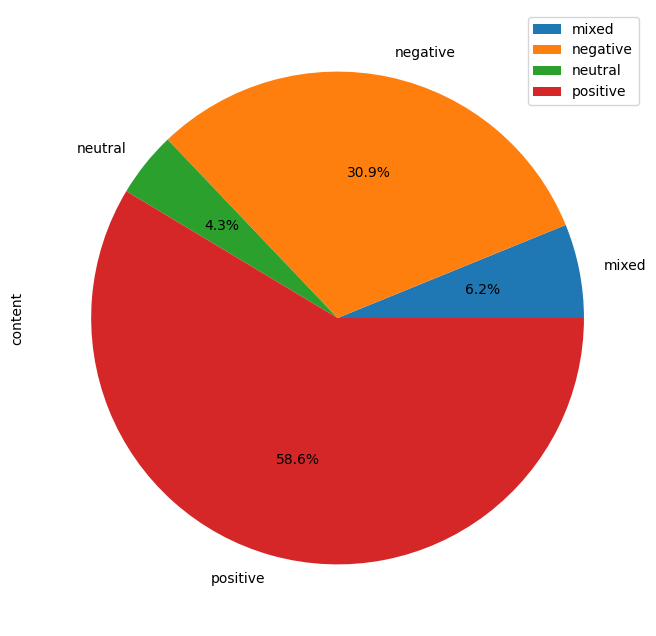

In [50]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [51]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                 202
           2                  41
           3                  53
           4                  61
           5                  82
negative   1                1536
           2                 199
           3                 186
           4                 152
           5                 131
neutral    1                 146
           2                  26
           3                  36
           4                  30
           5                  67
positive   1                 125
           2                  40
           3                 154
           4                 727
           5                3128
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

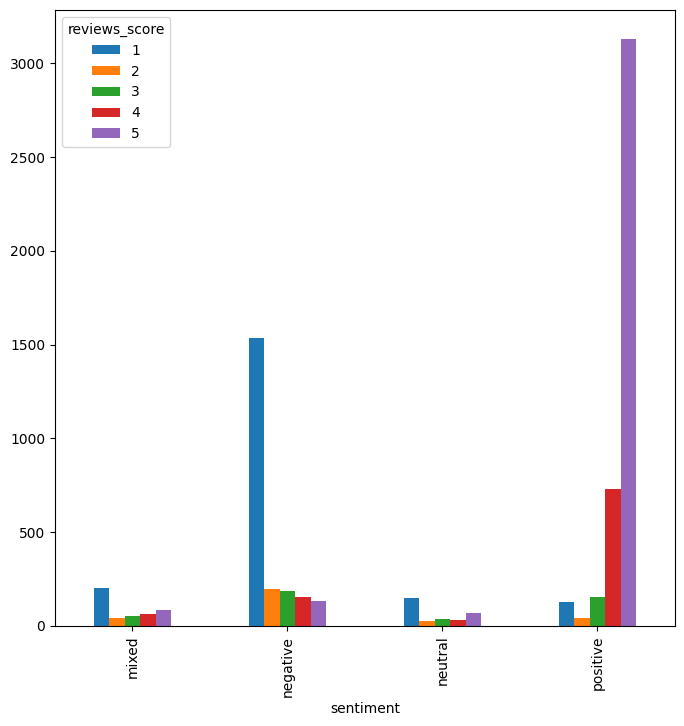

In [52]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [53]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7122 entries, 0 to 7121
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        7122 non-null   object
 1   sentiment      7122 non-null   object
 2   reviews_score  7122 non-null   object
dtypes: object(3)
memory usage: 167.0+ KB


In [54]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [55]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [56]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [57]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7122 entries, 0 to 7121
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        7122 non-null   object
 1   sentiment      7122 non-null   int64 
 2   reviews_score  7122 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 167.0+ KB


In [58]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                 125
           2                  40
           3                 154
           4                 727
           5                3128
1          1                1536
           2                 199
           3                 186
           4                 152
           5                 131
2          1                 202
           2                  41
           3                  53
           4                  61
           5                  82
3          1                 146
           2                  26
           3                  36
           4                  30
           5                  67
Name: content, dtype: int64